In [1]:
import pandas as pd

# Defne the file path
file_path = '/vols/cms/mm1221/hgcal/TrackPi/StaticEdge/results/init/hyperparameter_search_results.csv'

# Load the CSV into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


      lr  batch_size  hidden_dim  num_layers  dropout  k_value  \
0  0.001          32          32           2      0.2        4   
1  0.001          32          32           4      0.2        4   
2  0.001          32          32           2      0.2        4   
3  0.001          32          32           3      0.2        4   
4  0.001          32          32           2      0.2       12   

   contrastive_dim  best_val_loss    purity  efficiency  
0                8       0.000011  0.827689    0.728791  
1                8       0.000005  0.917307    0.892214  
2              128       0.000009  0.877855    0.824230  
3                8       0.000005  0.913948    0.879721  
4                8       0.000009  0.883849    0.792998  


/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/seaborn/matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


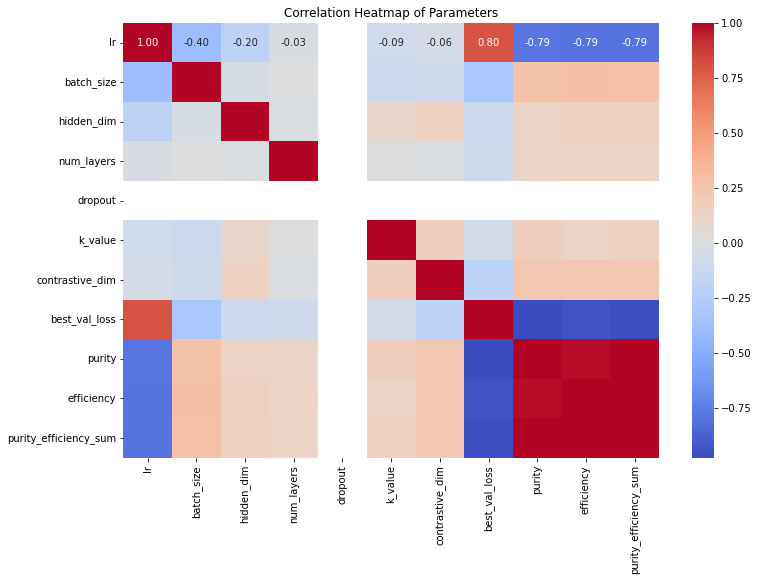

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Parameters")
plt.show()


In [2]:
# Create a combined metric for purity + efficiency
df['purity_efficiency_sum'] = df['purity'] + df['efficiency']

# Find the row with the highest combined value
best_combination = df.loc[df['purity_efficiency_sum'].idxmax()]
print("Best Combination for Purity + Efficiency:")
print(best_combination)


Best Combination for Purity + Efficiency:
lr                         0.000500
batch_size                32.000000
hidden_dim               128.000000
num_layers                 3.000000
dropout                    0.200000
k_value                   12.000000
contrastive_dim          128.000000
best_val_loss              0.000004
purity                     0.953949
efficiency                 0.962667
purity_efficiency_sum      1.916616
Name: 63, dtype: float64


In [3]:
# Create a combined metric for purity + efficiency
df['purity_efficiency_sum'] = df['purity'] + df['efficiency']

# Get the top 5 rows with the highest combined purity + efficiency
top_5_combinations = df.nlargest(20, 'purity_efficiency_sum')

# Display the top 5 combinations
print("Top 5 Combinations for Highest Purity + Efficiency:")
print(top_5_combinations)



Top 5 Combinations for Highest Purity + Efficiency:
         lr  batch_size  hidden_dim  num_layers  dropout  k_value  \
63  0.00050          32         128           3      0.2       12   
21  0.00100          32         128           3      0.2       12   
94  0.00055          32         128           3      0.1       12   
64  0.00070          32         128           3      0.2       12   
8   0.00100          32          32           4      0.2       12   
33  0.00100          64          32           4      0.2       12   
88  0.00050          32         128           3      0.1       12   
93  0.00055          32         128           3      0.3       12   
67  0.00200          32         128           3      0.2       12   
86  0.00050          32         128           3      0.1       12   
34  0.00100          64          32           2      0.2       12   
78  0.00045          32         128           3      0.1       12   
10  0.00100          32          32           3    

In [5]:
# Scatter plot for loss vs purity and efficiency
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='best_val_loss', y='purity', label='Purity')
sns.scatterplot(data=df, x='best_val_loss', y='efficiency', label='Efficiency')
plt.title('Relationship Between Loss, Purity, and Efficiency')
plt.xlabel('Best Validation Loss')
plt.ylabel('Purity / Efficiency')
plt.legend()
plt.show()


NameError: name 'plt' is not defined

In [7]:
print("Correlation of Loss with Purity:", df['best_val_loss'].corr(df['purity']))
print("Correlation of Loss with Efficiency:", df['best_val_loss'].corr(df['efficiency']))


Correlation of Loss with Purity: -0.9744025051343034
Correlation of Loss with Efficiency: -0.9388053758148813
